ASSIGNMENT 4

Load "diabetes" datasets from SKlearn and do the PCA for n=3, and plot the data. 

In [110]:
#importing dataset
import pandas as pd
from sklearn.datasets import load_diabetes
data = load_diabetes()
x = data['data']
y = data['target']
print(x.shape, y.shape)             #printing shapes


(442, 10) (442,)


In [111]:
#Transform the data 
from sklearn.preprocessing import StandardScaler     #import standard scaler processor
#### Standerdize the data###
scale = StandardScaler()                                                 
scale.fit(x)                             
data_scale = scale.transform(x)         
data_scale                                         

array([[ 0.80050009,  1.06548848,  1.29708846, ..., -0.05449919,
         0.41853093, -0.37098854],
       [-0.03956713, -0.93853666, -1.08218016, ..., -0.83030083,
        -1.43658851, -1.93847913],
       [ 1.79330681,  1.06548848,  0.93453324, ..., -0.05449919,
         0.06015558, -0.54515416],
       ...,
       [ 0.87686984,  1.06548848, -0.33441002, ..., -0.23293356,
        -0.98564884,  0.32567395],
       [-0.9560041 , -0.93853666,  0.82123474, ...,  0.55838411,
         0.93616291, -0.54515416],
       [-0.9560041 , -0.93853666, -1.53537419, ..., -0.83030083,
        -0.08875225,  0.06442552]])

In [112]:
from sklearn.decomposition import PCA                    #import PCA from sklearn
pca = PCA(n_components=3)                                
PCAcomps = pca.fit_transform(data_scale)                 #apply PCA to dataset
PCA_data = pd.DataFrame(data = PCAcomps, columns = ['Principal component 1', 'Principal component 2','Principal component 3']) #create 2 columns 
print(PCA_data)                                         

     Principal component 1  Principal component 2  Principal component 3
0                 0.587199              -1.946832               0.589205
1                -2.831625               1.372082               0.027930
2                 0.272129              -1.634901               0.739244
3                 0.049281               0.382278              -2.013032
4                -0.756421               0.811960              -0.057238
..                     ...                    ...                    ...
437               1.239525              -1.035968               0.928679
438               1.264719               0.761319              -1.750191
439              -0.205206              -1.205487               0.496186
440               0.692871               0.210127              -0.868724
441              -1.903941               3.975777              -0.048338

[442 rows x 3 columns]


<ipython-input-113-96f6e711437e>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(PCA_data.iloc[:,0], PCA_data.iloc[:,1], PCA_data.iloc[:,2], color = colors[1], cmap="Set2_r", s=80)


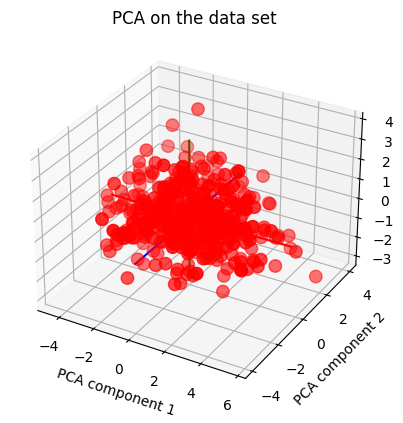

In [113]:
import matplotlib.pyplot as plt
fig = plt.figure()
colors=['b', 'r', 'g']
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PCA_data.iloc[:,0], PCA_data.iloc[:,1], PCA_data.iloc[:,2], color = colors[1], cmap="Set2_r", s=80)
 
xAxisLine = ((min(PCA_data.iloc[:,0]), max(PCA_data.iloc[:,0])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(PCA_data.iloc[:,1]), max(PCA_data.iloc[:,1])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'b')
zAxisLine = ((0, 0), (0,0), (min(PCA_data.iloc[:,2]), max(PCA_data.iloc[:,2])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'g')
 
ax.set_xlabel("PCA component 1")
ax.set_ylabel("PCA component 2")
ax.set_zlabel("PCA component 3")
ax.set_title("PCA on the data set")
plt.show()

2.  What is the variance (%) covered by first 3 components?  How is this percentage of variance computed? 

In [114]:
import numpy as np
variance = pca.explained_variance_ratio_           #Explained variance
print(np.round(variance*100,2))                   

[40.24 14.92 12.06]


In [115]:
####### Calculate the percentage of variance #####
percentage = variance/sum(variance)                     
print (np.round(percentage*100,2))                                     

[59.86 22.2  17.94]


3.Is there any correlation between these three components? 
  There is no correlation between any components. 

4. Apply t-SNE on the same dataset, select first 3 components and plot them.



In [116]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, verbose=1, random_state=123)
z = tsne.fit_transform(data_scale)  

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 442 samples in 0.001s...
[t-SNE] Computed neighbors for 442 samples in 0.018s...
[t-SNE] Computed conditional probabilities for sample 442 / 442
[t-SNE] Mean sigma: 1.189781
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.779484
[t-SNE] KL divergence after 900 iterations: 0.710645


5.Report the comparison between the results obtained using t-SNE and PCA.
  
  
  PCA method provides better clustering than t-SNE method. 